In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np 

# the data has been already split into cross-validation and training

# load the data
(train_data, train_labels) , (test_data, test_labels) = fashion_mnist.load_data()

# set seed
tf.random.set_seed(42)

# -- uncomment to visualize data --
"""
# shape(28,28)
print("Training data [1]")
plt.imshow(train_data[1], cmap="binary")
# scalar 
print(f"Training label: {train_labels[0]}\n")
"""

# changing the index labels to human readable
def index_to_human(index):
  """
  takes an index as input and returns a string containing the specific label
  """
  label_description = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
  return label_description[index]


In [ ]:
# Build multi-class classification
model_1 = tf.keras.Sequential([
    # input shape
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # hidden layers
    tf.keras.layers.Dense(14, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(14, activation=tf.keras.activations.relu),
    # output layer -> multi-class -> 28
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])

# compile the model
model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.005),
    metrics=["accuracy"])

# fit the model
unformed_history_1 = model_1.fit(train_data, train_labels, epochs=100, validation_data=(test_data, test_labels))


In [3]:
def useful_model_info(model):
  """
  prints some useful information of some model passed
  """
  model.summary()
  # model.evaluate(X_test, y_test)


In [5]:
# Normalize data because of poor accuracy
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [ ]:
# second model, now with normalized data
# build model
model_2 = tf.keras.Sequential([
  # input shape
  tf.keras.layers.Flatten(input_shape=(28,28)),
  # hidden layer
  tf.keras.layers.Dense(14, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(14, activation=tf.keras.activations.relu),
  # output layer
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])

# compile model
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.005),
    metrics=["accuracy"])

# fit model
unformed_history_2 = model_2.fit(
    train_data_norm, train_labels, epochs=100, validation_data=(test_data_norm, test_labels)
)

In [7]:
def plot_history(history, title):
  """
  plot history loss, accuracy curves 
  """
  pd.DataFrame(history.history).plot(title=title)

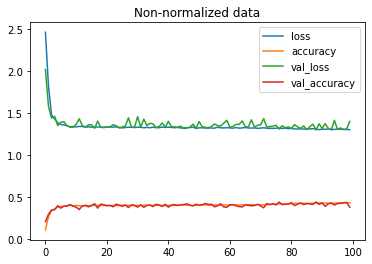

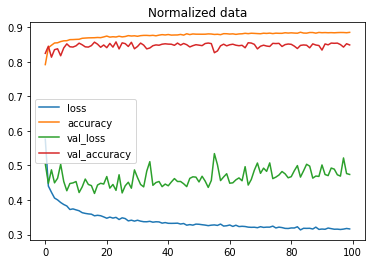

In [8]:
plot_history(history=unformed_history_1, title="Non-normalized data")
plot_history(history=unformed_history_2, title="Normalized data")

In [9]:
# find ideal learning rate to further improve the performance of the model
# use learning rate callback 
dummy_lr_model = tf.keras.Sequential([
  # input shape
  tf.keras.layers.Flatten(input_shape=(28,28)),
  # hidden layers
  tf.keras.layers.Dense(14, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(14, activation=tf.keras.activations.relu),
  # output layer
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])

# compile model
dummy_lr_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.005),
    metrics=["accuracy"])

# create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
lr_model_h = dummy_lr_model.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6583 - accuracy: 0.7728 - val_loss: 0.4918 - val_accuracy: 0.8273 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4547 - accuracy: 0.8404 - val_loss: 0.5124 - val_accuracy: 0.8215 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4242 - accuracy: 0.8504 - val_loss: 0.4535 - val_accuracy: 0.8356 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4044 - accuracy: 0.8566 - val_loss: 0.4391 - val_accuracy: 0.8437 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3928 - accuracy: 0.8601 - val_loss: 0.4569 - val_accuracy: 0.8400 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3834 - accuracy: 0.8621 - val_loss: 0.4615 - val_accuracy: 0.8252 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

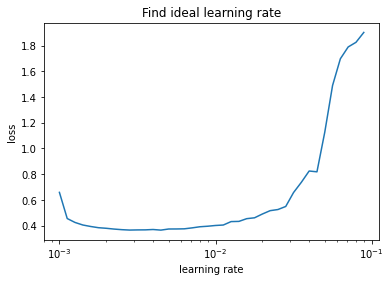

In [11]:
# plot the ideal learning rate
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_model_h.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Find ideal learning rate");

In [12]:
# third model, now with new learning rate
# build model
model_3 = tf.keras.Sequential([
  # input shape
  tf.keras.layers.Flatten(input_shape=(28,28)),
  # hidden layer
  tf.keras.layers.Dense(14, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(14, activation=tf.keras.activations.relu),
  # output layer
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])

# compile model
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.004),
    metrics=["accuracy"])

# fit model
unformed_history_3 = model_3.fit(
    train_data_norm, train_labels, epochs=100, validation_data=(test_data_norm, test_labels)
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5922 - accuracy: 0.7878 - val_loss: 0.4943 - val_accuracy: 0.8274
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4588 - accuracy: 0.8360 - val_loss: 0.5202 - val_accuracy: 0.8189
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4349 - accuracy: 0.8433 - val_loss: 0.4947 - val_accuracy: 0.8181
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4173 - accuracy: 0.8499 - val_loss: 0.4860 - val_accuracy: 0.8234
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4068 - accuracy: 0.8531 - val_loss: 0.4808 - val_accuracy: 0.8317
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3982 - accuracy: 0.8552 - val_loss: 0.4875 - val_accuracy: 0.8207
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3941 - accuracy: 0.8570 - val_loss: 0.4737 - val_ac

In [59]:
# create confusion matrix
def confusion_matrix_plotter(y_test, y_preds, classes=None):
  figsize = (15, 15)

  # create the confusion matrix
  cm = confusion_matrix(y_test, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize the cm
  n_classes = cm.shape[0]

  # lets prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.RdPu)
  fig.colorbar(cax)

  # create classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  
  # set x_axis labels (bottom / top)
  # change "bottom" to "top" if needed
  ax.xaxis.set_label_position("bottom")
  # uncomment for top
  # ax.xaxis.tick_top()
  ax.xaxis.tick_bottom()

  # adjust label size
  ax.yaxis.label.set_size(10)
  ax.xaxis.label.set_size(10)
  ax.title.set_size(15)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm [i, j] > threshold else "black",
            size=10)

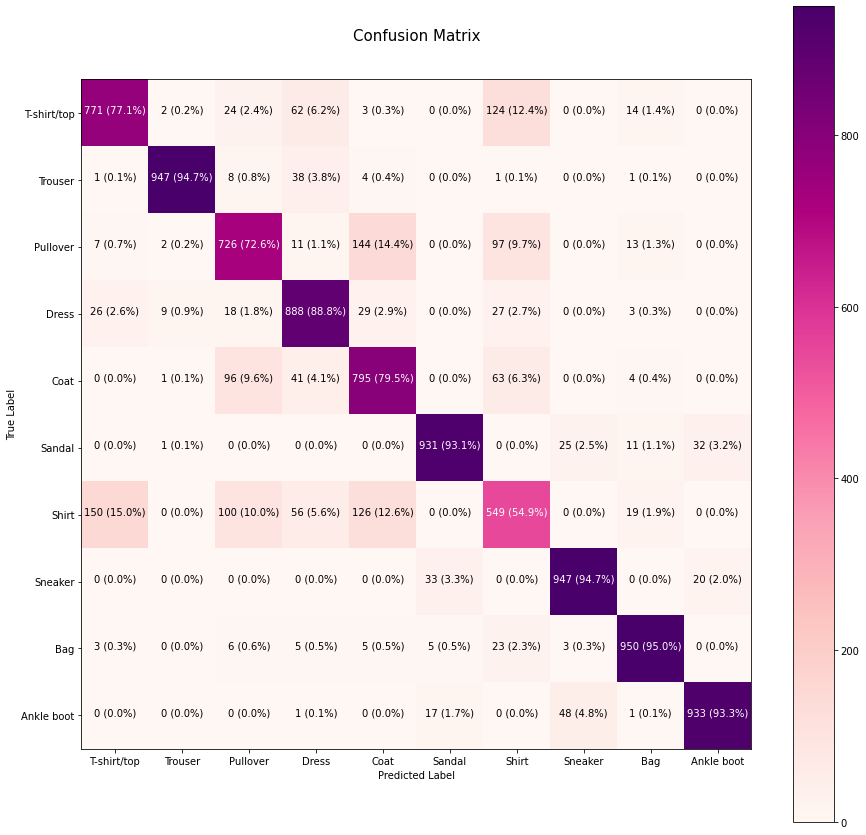

In [60]:
# create the predictions
y_probs = model_3.predict(test_data_norm)
y_preds = y_probs.argmax(axis=1)

"""
for i in y_preds[:10]:
  print(index_to_human(i))
"""

# create the matrix
label_description = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
confusion_matrix_plotter(y_test=test_labels, y_preds=y_preds[:10000], classes=label_description)
# confusion_matrix(y_test, tf.round(y_preds))


In [15]:
"""
README

ALWAYS predict with data that was used to train the data

"""

'\nREADME\n\nALWAYS predict with data that was used to train the data\n\n'

In [79]:
# create a function to plot a random image as well as its prediction with truth

def plot_random_img(model, images, true_labels, classes):
  import random

  """
  Picks an random image and plots its labels and predictions
  as well as the truth label
  """

  rand_num = random.randint(0, len(images))

  # create predictions and targets
  target_img = images[rand_num]
  pred_probs = model.predict(target_img.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[rand_num]]

  # plot img
  plt.imshow(target_img, cmap=plt.cm.binary)

  # change color of titles depending on accuracy
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # add xlabel info 
  plt.xlabel("Prediction: {} \n Certainty: {:2.0f}% \n Truth: {}".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
                                                   color=color)
  

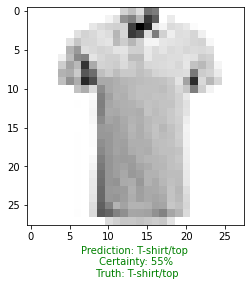

In [87]:
# check a random image as well as prediction
plot_random_img(model=model_3, images=test_data_norm, true_labels=test_labels, classes=label_description)

In [93]:
# get the patterns of a layer in network
weights, biases = model_3.layers[1].get_weights()
weights, biases


(array([[-2.1142434e-02, -3.1028101e+00, -1.4631100e-02, ...,
         -4.8938146e+00, -8.7839193e+00,  7.7883758e-02],
        [-4.8239322e+00,  8.8396759e+00,  4.4162604e-01, ...,
          1.5129270e+01,  2.5160942e+00, -2.6444670e-02],
        [-6.1288590e+00,  9.2391005e+00,  4.0592284e+00, ...,
          8.2273045e+00, -1.8281343e+01,  7.7408783e-02],
        ...,
        [ 1.7292374e+00,  1.8724562e+00,  3.5020692e+00, ...,
          3.5153787e+00,  2.4494455e+00, -2.3991823e-02],
        [-9.5533413e-01, -4.8680439e+00,  1.1067314e+00, ...,
          3.4195318e+00, -1.1532718e+00, -4.3385722e-02],
        [ 9.9815649e-01,  4.5337377e+00,  1.1250852e+00, ...,
          2.0005646e+00, -1.1664203e+00,  6.5362148e-02]], dtype=float32),
 array([ 1.8994    ,  5.4091535 ,  3.8616583 ,  3.9919918 ,  6.387811  ,
        -0.02901258, -0.0679857 , -0.65837127, -0.02402106, -0.02316676,
         5.2994466 ,  3.178571  ,  2.857335  , -0.02335138], dtype=float32))

In [ ]:
"""
Each neuron has a vector with a cost function, with weights and biases

BIAS: dictates how much the patterns within the corresponding the weights matrix
should influence the next layer

WEIGHTS: is the parameter within a neural network that transforms input data 
within the network's hidden layers

"""

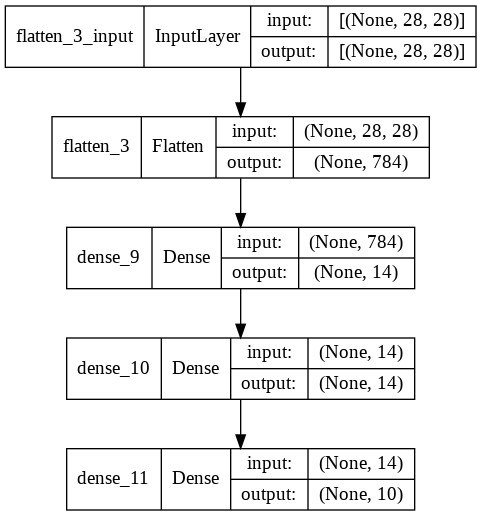

In [94]:
# show the inputs and outputs of the neural network
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes=True)